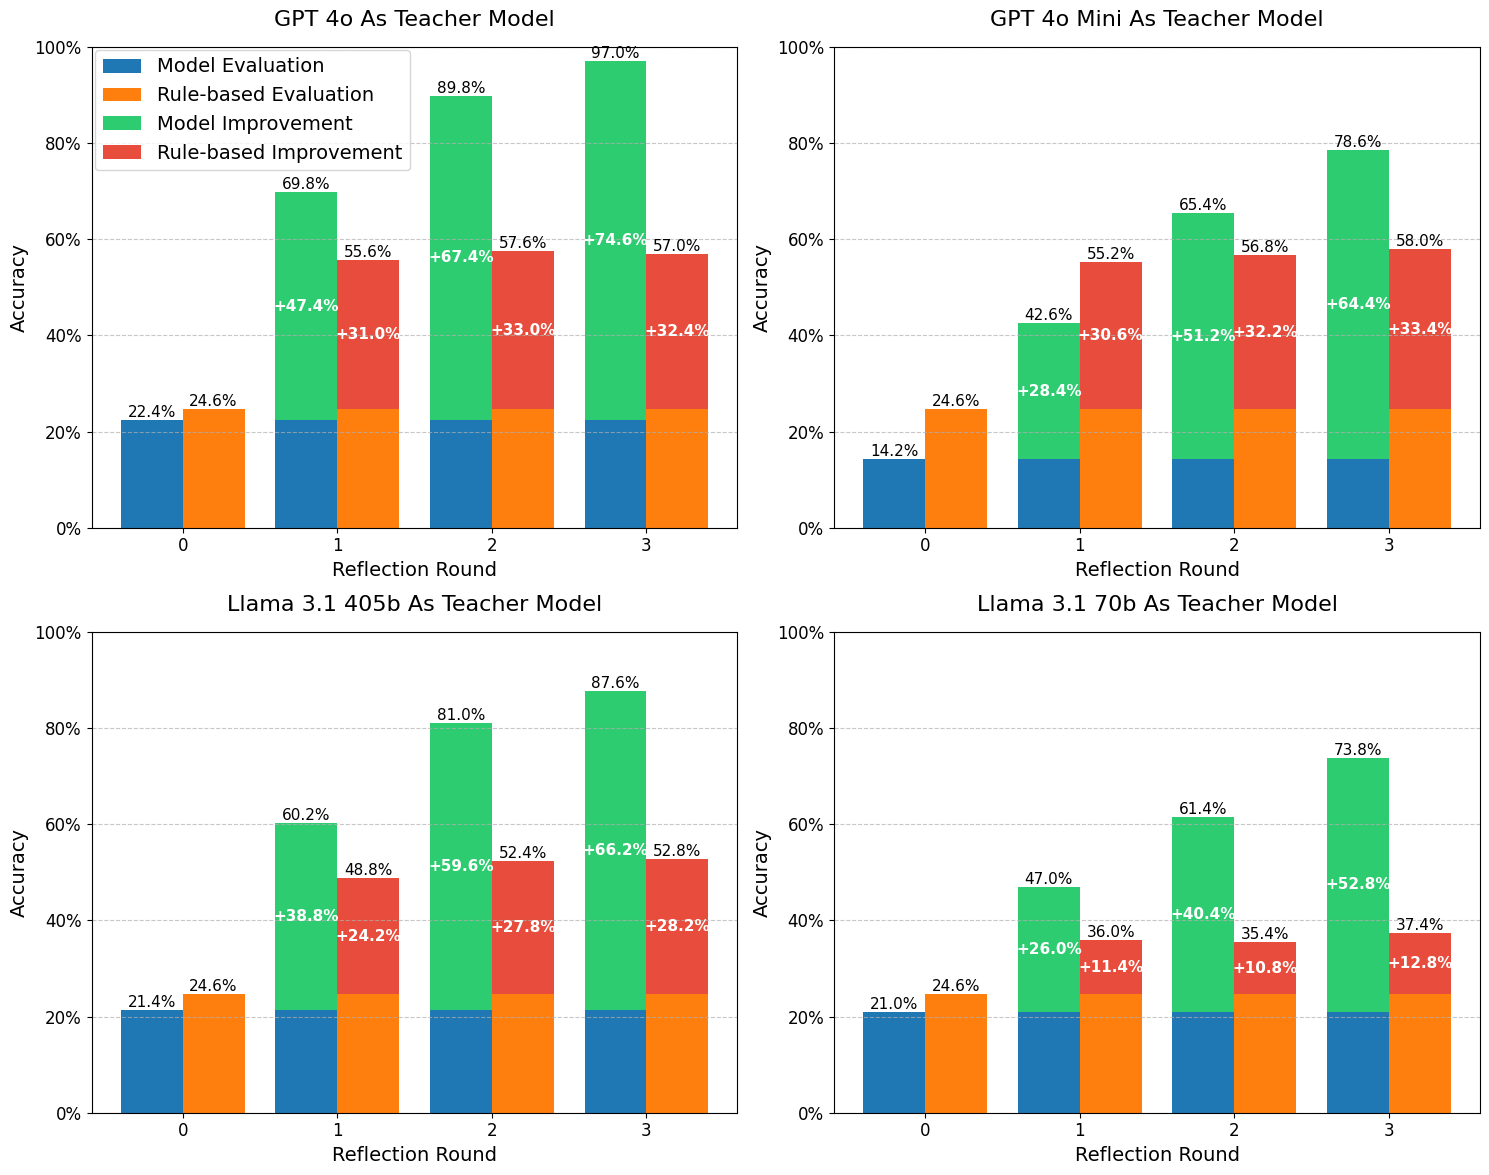

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data - replace with your actual accuracy values
data = {
    'GPT 4o': {
        'model': [0.224, 0.698, 0.898, 0.97],
        'rule': [0.246, 0.556, 0.576, 0.57]
    },
    'GPT 4o Mini': {
        'model': [0.142, 0.426, 0.654, 0.786],
        'rule': [0.246, 0.552, 0.568, 0.58]
    },
    'Llama 3.1 405b': {
        'model': [0.214, 0.602, 0.81, 0.876],
        'rule': [0.246, 0.488, 0.524, 0.528]
    },
    'Llama 3.1 70b': {
        'model': [0.21, 0.47, 0.614, 0.738],
        'rule': [0.246, 0.36, 0.354, 0.374]
    }
}

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('', fontsize=32, y=0.95)

# Flatten axes array for easier iteration
axes = axes.flatten()

# Reflection rounds
rounds = np.arange(4)
bar_width = 0.4

# Colors for different evaluation types
model_color = '#1f77b4'  # Blue for model evaluation
rule_color = '#ff7f0e'  # Orange for rule-based evaluation
model_improvement_color = '#2ecc71'  # Green for model improvement
rule_improvement_color = '#e74c3c'  # Red for rule-based improvement

# Define font sizes
TITLE_SIZE = 16
LABEL_SIZE = 14
TICK_SIZE = 12
ANNOTATION_SIZE = 11

# Plot for each model
for idx, (model_name, eval_data) in enumerate(data.items()):
    model_baseline = eval_data['model'][0]
    rule_baseline = eval_data['rule'][0]
    
    # Position bars
    model_positions = rounds - bar_width/2
    rule_positions = rounds + bar_width/2
    
    # Create base bars for model evaluation
    model_bars = axes[idx].bar(model_positions, eval_data['model'], 
                              width=bar_width, color=model_color, 
                              label='Model Evaluation')
    
    # Create base bars for rule-based evaluation
    rule_bars = axes[idx].bar(rule_positions, eval_data['rule'], 
                             width=bar_width, color=rule_color, 
                             label='Rule-based Evaluation')
    
    # Add improvement portions
    for i in range(len(rounds)):
        if i > 0:
            # Model improvements
            model_improvement = eval_data['model'][i] - model_baseline
            if model_improvement > 0:
                axes[idx].bar(model_positions[i], model_improvement, 
                            width=bar_width, bottom=model_baseline, 
                            color=model_improvement_color)
            
            # Rule-based improvements
            rule_improvement = eval_data['rule'][i] - rule_baseline
            if rule_improvement > 0:
                axes[idx].bar(rule_positions[i], rule_improvement, 
                            width=bar_width, bottom=rule_baseline, 
                            color=rule_improvement_color)
    
    # Add value labels and improvement annotations
    for i, (model_bar, rule_bar) in enumerate(zip(model_bars, rule_bars)):
        # Model evaluation labels
        model_height = model_bar.get_height()
        axes[idx].text(model_bar.get_x() + model_bar.get_width()/2., model_height,
                      f'{model_height:.1%}', ha='center', va='bottom',
                      fontsize=ANNOTATION_SIZE)
        
        # Rule-based evaluation labels
        rule_height = rule_bar.get_height()
        axes[idx].text(rule_bar.get_x() + rule_bar.get_width()/2., rule_height,
                      f'{rule_height:.1%}', ha='center', va='bottom',
                      fontsize=ANNOTATION_SIZE)
        
        # Add improvement annotations for non-baseline bars
        if i > 0:
            # Model improvements
            model_improvement = model_height - model_baseline
            if model_improvement > 0:
                axes[idx].text(model_bar.get_x() + model_bar.get_width()/2.,
                             model_baseline + model_improvement/2,
                             f'+{model_improvement:.1%}', ha='center', va='center',
                             color='white', fontweight='bold', fontsize=ANNOTATION_SIZE)
            
            # Rule-based improvements
            rule_improvement = rule_height - rule_baseline
            if rule_improvement > 0:
                axes[idx].text(rule_bar.get_x() + rule_bar.get_width()/2.,
                             rule_baseline + rule_improvement/2,
                             f'+{rule_improvement:.1%}', ha='center', va='center',
                             color='white', fontweight='bold', fontsize=ANNOTATION_SIZE)
    
    # Customize each subplot
    axes[idx].set_title(f'{model_name} As Teacher Model', pad=15, fontsize=TITLE_SIZE)
    axes[idx].set_xlabel('Reflection Round', fontsize=LABEL_SIZE)
    axes[idx].set_ylabel('Accuracy', fontsize=LABEL_SIZE)
    axes[idx].grid(True, linestyle='--', alpha=0.7, axis='y')
    axes[idx].set_xticks(rounds)
    axes[idx].set_ylim(0.0, 1.0)
    
    # Increase tick label sizes
    axes[idx].tick_params(axis='both', which='major', labelsize=TICK_SIZE)
    
    # Add percentage signs to y-axis
    axes[idx].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    
    # Add horizontal lines at baselines for visual reference
    # axes[idx].axhline(y=model_baseline, color='gray', linestyle='--', alpha=0.5)
    # axes[idx].axhline(y=rule_baseline, color='gray', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()

# Add legend with larger font
legend_elements = [
    plt.Rectangle((0,0),1,1, facecolor=model_color, label='Model Evaluation'),
    plt.Rectangle((0,0),1,1, facecolor=rule_color, label='Rule-based Evaluation'),
    plt.Rectangle((0,0),1,1, facecolor=model_improvement_color, label='Model Improvement'),
    plt.Rectangle((0,0),1,1, facecolor=rule_improvement_color, label='Rule-based Improvement')
]
fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.06, 0.95), 
          fontsize=LABEL_SIZE)

# Show plot
plt.show()

In [23]:
fig.savefig('accuracy_plot.pdf', bbox_inches='tight')